# Multiple Linear Regression
Multiple linear regression takes the form of fitting to a trendline, specifically in this case a polynomial trendline. It is similat to simple linear regression, but works with many variables. 

$y = b_0+b_1*x_1+b_2*x_2+...+b_n*x_n$ 

- $y$ is the Dependent Variable (DV)
- $x_i$ is an Independent Variable (IV)
- The independent variable may directly or indirectly affect the DP
- $b_i$ is a coefficient (coefficient can be considered to be coefficient of proportion) 
- $b_o is the constant 

**NOTE** - Assunptions of Linear Regression:
- Linearity
- Homoscedasticity
- Multivariate normality
- Independence of errors
- Lack of multicollinearity 

## Problem Statement
In this guide, we want build a model predicting a companies profits based on it's expenses.

$y = b_0+b_1*x_1+b_2*x_2+b_3*x_3+b_?*x_?$ 

- $x_1$ is the R&D Spend
- $x_2$ is the Admin cost
- $x_3$ is the Marketing cost
- $x_?$ is the State

But how do we represent the state? It is categorical data! 
<br>
Therefore, we replace the State with a dummy variable (see categorical encoding in data_preproccessing tools)

## Caveats of Categorical Encoding
If the set of States had a size of 2 (there are only two states) we could replace the State column with a single binary value. This makes sense as 0 could represent a state, and 1 the other state. This works as a 'light switch'.
<br>

One might see this as potential issue with this is that the 0 value will not have a coefficient:
<br>
$b_4*0=0$

**But**, this is accounted for in constant $b_0$
<br>
If we were to have kept two binary values instead of one, we would have created a situation where one column was directly dependent on another. Hence they would no longer be Independent Variables - This is known as the dummy variable trap.



## The P-Value
Before embaraking on the journey of multiple linear regression, it is imperative you understand the P-Value.
<br>
A guide on what the P-Value is can be found [here](https://www.mathbootcamps.com/what-is-a-p-value/) or [here](https://www.wikihow.com/Calculate-P-Value).

### Definition of the P-Value:
The probability that, IF the null hypothesis were true, sampling variation would produce an estimate that is further from the hypothersised value than our data estimate.
In less formal terms, the p-value tells us how likely it is to get a result like this if the Null Hypothesis is true.

## Process of constructing a model
When constructing a model it is important to pay attention to it's structure. Building a model based on bad information will give you a bad model.
There are several methods for building multiple linear regression models. These include:

1. All-in
2. Backward Elimination
3. Forward Selection
4. Bidirectional Elimination
5. Score Comparison

2,3,4 and can fall under stepwise regression

## 1.All-in
The processes of throwing all your data into the model. This is not a good idea for several reason.

- Bad data produces a bad model
- Understanding and explaining correlation in the model

When would we use this model?

- When we have prior knowledge and know what the important data is
- When prepairing for Bakward Elimination
- When you are forced to :)

## 2.Bakward Elimination

**Step 1**: Select a significance level to stay in the model (e.g. $SL=0.05$)
<br>
**Step 2**: Fit the full model with all possible predictors
<br>
**Step 3**: Consider the predictor with the **highest** P-Value. If $P > SL$, go to Step 4, otherwise go to FIN
<br>
**Step 4**: Remove the predictor
<br>
**Step 5**: Fit the model without this variable! Go back to Step 3
<br>
**FIN** - Your model is ready

## 3.Forward Elimination

**Step 1**: Select a significance level to enter the model (e.g. $SL=0.05$)
<br>
**Step 2**: Fit all simple regression models $y\sim x_n$ Select the one with the lowest P-value
<br>
**Step 3**: Keep this fariable and fit all possible models with one extra predictor added to the one(s) you already have
<br>
**Step 4**: Consider the predictor with the **lowest** P-value. If $P<SL$, go to step 3, otherwise go to FIN (and use previous model)

## 4.Bidirectional Elimination

**Step 1**: Select a significance level to enter and a significance level to stay in the model (e.g. $SL=0.05$)
<br>
**Step 2**: Perform the next step of Forward Selection. (new variables must have $P<SL_{ENTER}$ to enter)
<br>
**Step 3**: Perform ALL STEPS of Backward Elimination. (old variables must have $P<SL_{STAY}$ to stay) Go back to Step 2. 
<br>
**Step 4**: No new variables can enter and no old variables can exit

## 5.All Possible Models
This approach is the most resource intensive

**Step 1**: Select a criterion of goodnesss of fit (e.g. Akaike criterion)
<br>
**Step 2**: Construct all possible regression Models : $2^N-1$ total combinations
<br>
**Step 3**: Select the model with the best criterion.


To give you an idea of how intensive this is, consider a model with 10 columns : $2^{10}-1 = 1,023$ models
<br>
This might not be a good idea for large models.

# Building a Backward Elimination Model
We will build this model as it is efficient and effective enough for the purposes of this guide. 
* Note: In multiple linear regression, feature scaling is not required as the coefficients will take care of this.
* Later guides will show you how to create a quick multiple linear regression model. Implement this check accurancy of the model instead of checking linearity of data

## Importing the libraries

In [12]:
# General Imoprts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Splitting the data
from sklearn.model_selection import train_test_split

# Linear Regression Model
from sklearn.linear_model import LinearRegression

## Importing the dataset


In [8]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data
**Note***: One of the dummy variables will be redundant

In [10]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set
- Do we need to do anything to avoid the dummy variable trap?
<br>
No! The multiple linear regression class that is imported will automatically avoid this trap.
- Do we need to worry about implementing the Backward Elimination process?
<br>
No! The multiple linear regression class that is imported will automatically do this for us.

The purpose of machine learning in today's world is speed and efficiency. There is no need to reinvent the wheel if it already exists.

In [16]:
regressor = LinearRegression() # The model is built but not trained
regressor.fit(X_train,y_train) # Train the multiple linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)

In [29]:
np.set_printoptions(precision=2) # Set number of decimals
# np.concatenate
print(np.concatenate( (y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)), 1 ))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


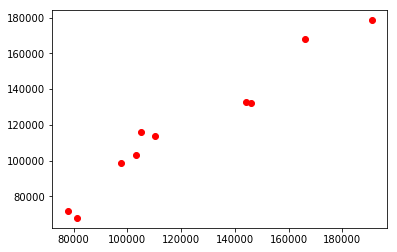

In [30]:
plt.figure()
plt.scatter(y_test,y_pred,color="red")

## Implementations of Automatic Backward Elimination

In [ ]:
# 1 

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

In [ ]:
# 2 

import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)